In [1]:
library(dplyr)
library(pheatmap)
library(RColorBrewer)
library(scico)

In [2]:
ref <- readRDS("/data/srlab1/public/srcollab/AMP_Phase_2/singlecell_result/all_cells_reference_2021-07-13.rds")
meta_data <- ref$meta_data

classification = readRDS("/data/srlab1/public/srcollab/AMP_Phase_2/singlecell_result/d_pca_category_2021-04-14.rds")
classification[1:4,]

## Comparing the proportion in each CTAP to the overall proportion:

In [73]:
# meta_data <- readRDS("/data/srlab1/public/srcollab/AMP_Phase_2/singlecell_result/fine_cluster_all_celltypes_82samples_2021-04-23.rds")
# classification = readRDS("/data/srlab1/public/srcollab/AMP_Phase_2/singlecell_result/d_pca_category_2021-04-14.rds")

ctap_prop <- meta_data %>% 
             group_by(new_class, sample) %>% 
             summarise(E = sum(cell_type == "Endothelial cell")/n(), 
                       F = sum(cell_type == "Stromal cell")/n(),
                       M = sum(cell_type == "Myeloid cell")/n(), 
                       T = sum(cell_type == "T cell")/n(), 
                       B = sum(cell_type == "B cell/plasma cell")/n(),
                       NK = sum(cell_type == "NK")/n()
                      ) %>% 
             ungroup %>% group_by(new_class) %>% summarise(E = mean(E), F = mean(F), M = mean(M), T = mean(T), B = mean(B), NK = mean(NK))

ctap_prop <- as.data.frame(ctap_prop)
# ctap_prop[is.num] <- lapply(ctap_prop[is.num], round, 2)
ctap_prop <- ctap_prop[complete.cases(ctap_prop), ]
ctap_prop

`summarise()` has grouped output by 'new_class'. You can override using the `.groups` argument.



,new_class,E,F,M,T,B,NK
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,E + F + M,0.28655010,0.28402216,0.29453093,0.1064730,0.01178470,0.01663914
2,F,0.09608310,0.51310385,0.16817210,0.1427129,0.06328024,0.01664784
3,M,0.08060143,0.10531983,0.43649747,0.2596978,0.08693775,0.03094573
4,T + B,0.04490215,0.06395714,0.11455849,0.5032137,0.22638531,0.04698317
5,T + F,0.05292217,0.30080228,0.06790567,0.4426448,0.10135416,0.03437095
6,T + M,0.07764052,0.05737026,0.27270196,0.4815352,0.08011761,0.03063442


In [74]:
# Overall proportions
overall_prop <-  colMeans(meta_data %>% 
                 left_join(classification, by = c("sample"="donor")) %>% 
                 group_by(sample) %>% 
                 summarise(E = sum(cell_type == "Endothelial cell")/n(), 
                           F = sum(cell_type == "Stromal cell")/n(), 
                           M = sum(cell_type == "Myeloid cell")/n(), 
                           T = sum(cell_type == "T cell")/n(), 
                           B = sum(cell_type == "B cell/plasma cell")/n(),
                           NK = sum(cell_type == "NK")/n()
                          ) %>% 
                 ungroup %>% select(-sample)) 

format(round(overall_prop, 2), nsmall = 2)
as.numeric(format(round(overall_prop, 2), nsmall = 2))

E      F      M      T      B     NK 
"0.11" "0.22" "0.25" "0.30" "0.10" "0.03"

[1] 0.11 0.22 0.25 0.30 0.10 0.03

In [75]:
ctap_prop <- rbind(ctap_prop, c("Overall", as.numeric(format(round(overall_prop, 2), nsmall = 2))))
ctap_prop

new_class,E,F,M,T,B,NK
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
E + F + M,0.286550099751144,0.284022162133234,0.294530929407037,0.106472968083759,0.0117847046372315,0.0166391359875948
F,0.096083103959898,0.513103851986859,0.168172097321436,0.142712863355372,0.0632802389044225,0.0166478444720128
M,0.0806014298573129,0.105319831751703,0.436497471168738,0.25969779398711,0.086937747296212,0.0309457259389238
T + B,0.0449021506574796,0.063957144152903,0.114558489840475,0.503213733680451,0.226385311100954,0.0469831705677366
T + F,0.0529221680909415,0.30080228467748,0.0679056656335,0.442644769514122,0.101354162883065,0.0343709492008907
T + M,0.0776405238044658,0.0573702630360574,0.272701956098485,0.48153522671678,0.0801176095055104,0.0306344208387011
Overall,0.11,0.22,0.25,0.3,0.1,0.03


In [71]:
# write.table(ctap_prop, file = paste("Supplementary_table2", ".txt", sep = ""),
#             row.names=T,col.names=T, quote = F, sep = "\t")

In [76]:
ctap_prop_heatmap <- ctap_prop
rown_names <- ctap_prop$new_class
ctap_prop_heatmap <- ctap_prop[,-1]

In [77]:
ctap_prop_heatmap <- transform(ctap_prop_heatmap, E = as.numeric(E))
ctap_prop_heatmap <- transform(ctap_prop_heatmap, F = as.numeric(F))
ctap_prop_heatmap <- transform(ctap_prop_heatmap, M = as.numeric(M))
ctap_prop_heatmap <- transform(ctap_prop_heatmap, T = as.numeric(T))
ctap_prop_heatmap <- transform(ctap_prop_heatmap, B = as.numeric(B))
ctap_prop_heatmap <- transform(ctap_prop_heatmap, NK = as.numeric(NK))
rownames(ctap_prop_heatmap) <- rown_names
ctap_prop_heatmap

,E,F,M,T,B,NK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E + F + M,0.28655010,0.28402216,0.29453093,0.1064730,0.01178470,0.01663914
F,0.09608310,0.51310385,0.16817210,0.1427129,0.06328024,0.01664784
M,0.08060143,0.10531983,0.43649747,0.2596978,0.08693775,0.03094573
T + B,0.04490215,0.06395714,0.11455849,0.5032137,0.22638531,0.04698317
T + F,0.05292217,0.30080228,0.06790567,0.4426448,0.10135416,0.03437095
T + M,0.07764052,0.05737026,0.27270196,0.4815352,0.08011761,0.03063442
Overall,0.11000000,0.22000000,0.25000000,0.3000000,0.10000000,0.03000000


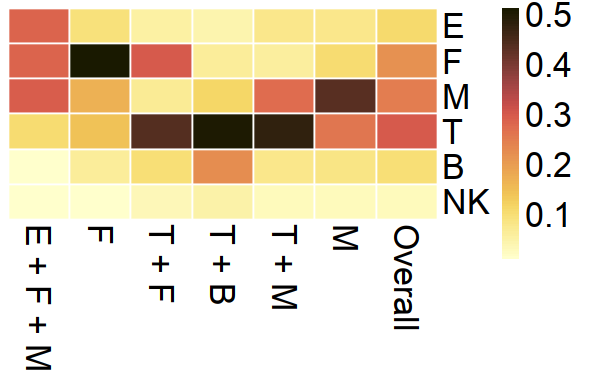

In [91]:
ctap_prop_heatmap <- ctap_prop_heatmap[c("E + F + M", "F", "T + F", "T + B", "T + M", "M", "Overall"),]

options(repr.plot.height = 3.2, repr.plot.width = 5)
filename <- "ctap_prop_heatmap.pdf"
hm.parameters <- list(
        mat = t((ctap_prop_heatmap)), 
#           breaks =  seq(-max(ctap_prop_heatmap), max(ctap_prop_heatmap), 0.1), # mat_breaks,
          color  =  scico(100, palette = 'lajolla'),  # lajolla 
#           color = colorRampPalette(rev(brewer.pal(n=9,name="RdGy")))(2*max(ctap_prop_heatmap)/0.1),  
          border_color = "white",
          show_rownames = TRUE,
          show_colnames = TRUE,
          cluster_rows = FALSE,
          cluster_cols = FALSE,
          cutree_rows = 4,
          cutree_cols = 3,
          width = 5, height = 3.2,
          fontsize = 20
        )
 
  # To draw the heat map on screen 
  do.call("pheatmap", hm.parameters)
 
  # To draw to file 
do.call("pheatmap", c(hm.parameters, filename=filename))